# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
* не менее двух визуализаций должны быть интерактивными.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

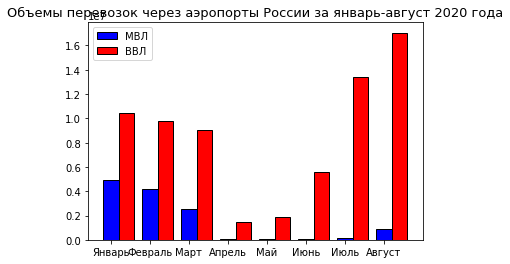

In [47]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

df_av_trans = pd.read_csv('avia_trans_volume.csv')
df_airp_pas = pd.read_csv('airports_passengers.csv')

df_av_trans[['МВЛ','ВВЛ']]

plt.title('A Multiseries Bar Chart', fontsize=20)
bw = 0.4
x = pd.Series(range(0, 8))
plt.bar(x,    df_av_trans['МВЛ'], bw, color = 'blue', edgecolor = 'black', label = 'МВЛ')
plt.bar(x+bw, df_av_trans['ВВЛ'], bw, color = 'red',  edgecolor = 'black', label = 'ВВЛ')
plt.title('Объемы перевозок через аэропорты России за январь-август 2020 года', fontsize=13)
plt.xticks(x, df_av_trans['Период'])
plt.legend(loc=2)

plt.show()

# sns.distplot(df_av_trans['Период'], hist=True, kde=False, 
#              bins=int(180/5), color = 'blue',
#              hist_kws={'edgecolor':'black'})

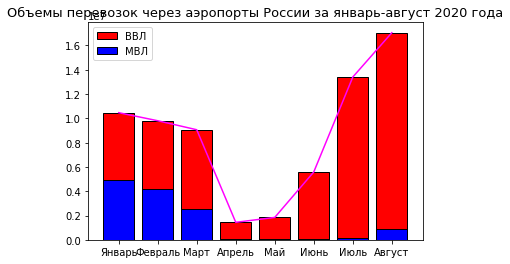

In [52]:
#df_airp_pas
plt.bar(x, df_av_trans['ВВЛ'], color = 'red',  edgecolor = 'black', label = 'ВВЛ')
plt.bar(x, df_av_trans['МВЛ'], color = 'blue', edgecolor = 'black', label = 'МВЛ')
plt.title('Объемы перевозок через аэропорты России за январь-август 2020 года', fontsize=13)
plt.xticks(x, df_av_trans['Период'])
plt.legend(loc=2)

plt.plot(df_av_trans['ВВЛ'], color = 'magenta', label = 'ВВЛ')
plt.show()


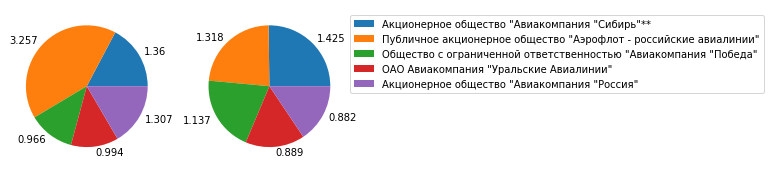

,Код_а/к,Авиапредприятие,2019_Сентябрь,2020_Сентябрь
0,С7,"Акционерное общество ""Авиакомпания ""Сибирь""**",1.360,1.425
1,СУ,"Публичное акционерное общество ""Аэрофлот - рос...",3.257,1.318
2,ДР,"Общество с ограниченной ответственностью ""Авиа...",0.966,1.137
3,У6,"ОАО Авиакомпания ""Уральские Авиалинии""",0.994,0.889
4,ФВ,"Акционерное общество ""Авиакомпания ""Россия""",1.307,0.882


In [126]:
plt.title('Объемы перевозок через аэропорты России за январь-август 2020 года', fontsize=13)
#plt.legend(loc=6)
#plt.show()

df_air_comp = pd.read_csv('air_comp.csv')
df_air_comp['2019_Сентябрь'] = round(df_air_comp['2019_Сентябрь']/1000000, 3)
df_air_comp['2020_Сентябрь'] = round(df_air_comp['2020_Сентябрь']/1000000, 3)

plt.subplot(1, 2, 1)
plt.pie(df_air_comp['2019_Сентябрь'], labels=df_air_comp['2019_Сентябрь'])
plt.subplot(1, 2, 2)
plt.pie(df_air_comp['2020_Сентябрь'], labels=df_air_comp['2020_Сентябрь'])
plt.legend(df_air_comp['Авиапредприятие'], bbox_to_anchor=(1, 1))

plt.show()
df_air_comp

In [73]:
df_airp_pas = pd.read_csv('airports_passengers.csv')

,Аэропорт,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август
0,Абакан,13495,14940,13768,2420,3211,7784,15994,23889
1,Айхал,0,0,0,0,0,0,0,0
2,Алдан,0,0,0,0,0,0,0,0
3,Амдерма,0,0,0,0,0,0,0,0
4,Анадырь(Угольный),4255,4565,4557,3824,4237,8531,10953,12410
...,...,...,...,...,...,...,...,...,...
261,Якутск,58549,53765,55651,19437,18286,32781,56103,82286
262,Якутск(Маган),0,0,0,0,0,0,0,0
263,Ямбург,5437,5401,4533,54,292,4656,1476,1168
264,Ярославль(Туношна),3638,3444,3517,609,83,2029,7882,10127


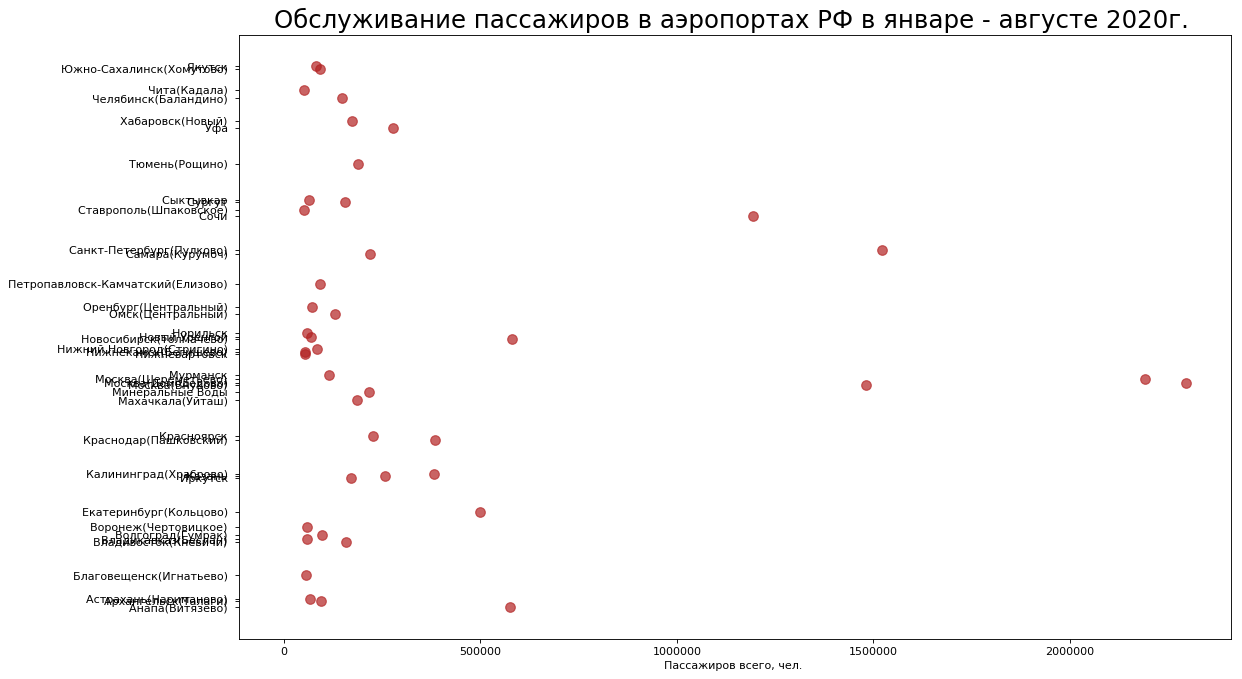

In [85]:
df_airp_pas_ag = df_airp_pas[['Аэропорт','Август']]
df = df_airp_pas_ag.query('Август > 50000') 

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df['Август'], s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Обслуживание пассажиров в аэропортах РФ в январе - августе 2020г. ', fontdict={'size':22})
ax.set_xlabel('Пассажиров всего, чел. ')
ax.set_yticks(df.index)
ax.set_yticklabels(df['Аэропорт'], fontdict={'horizontalalignment': 'right'})
#ax.set_xlim(10, 27)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/lib/python3/dist-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


TypeError: 'NoneType' object is not subscriptable

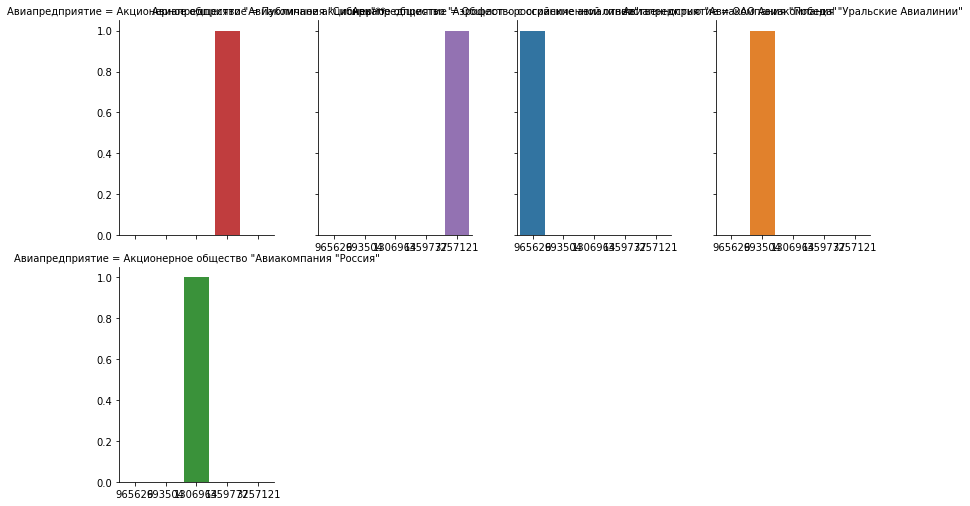

In [92]:
df_air_comp = pd.read_csv('air_comp.csv')
df_air_comp

import seaborn as sns

# Load Dataset
#titanic = sns.load_dataset("titanic")

# Plot
g = sns.catplot("2019_Сентябрь", col="Авиапредприятие", col_wrap=4,
                data=df_air_comp,
                kind="count", height=3.5, aspect=.8
                )

fig.suptitle('sf')
plt.show()

